In [101]:
import pandas as pd
incident_report = pd.read_csv("logs/incident_report.csv")


In [102]:
station_report = pd.read_csv("logs/station_report.csv")

In [103]:
fire_station=pd.read_csv('/Users/ammarbinzulqarnain/Documents/Scope Lab/Project/fire_simulator/data/stations.csv')

In [104]:
station_summary=station_report.groupby("StationID").agg({
    "IncidentID": "count",
    "TravelTime": lambda x: list(x),

}).reset_index().rename(columns={
    "IncidentID": "TotalIncidents",
    "TravelTime": "TravelTimes",

})
station_summary=station_summary.merge(fire_station, how='left', on='StationID')

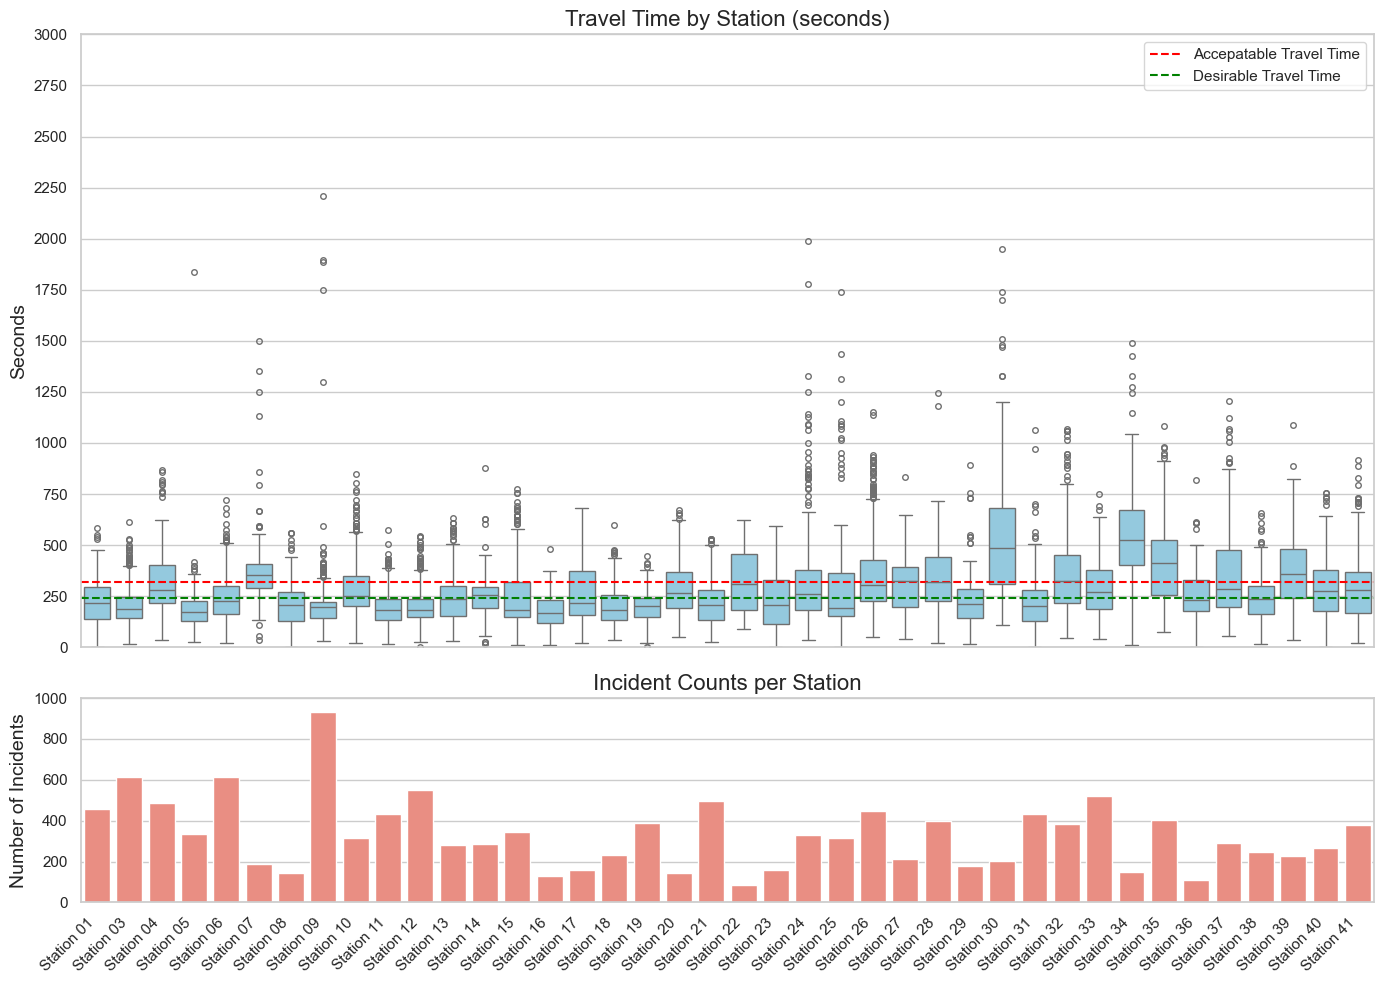

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- Prepare the data ---
# station_summary has columns: StationID, TotalIncidents, TravelTimes (a list)
# Explode the travel‐time lists into long form for seaborn
df_box = (
    station_summary
    .loc[:, ['Facility Name','TravelTimes']]
    .explode('TravelTimes')
    .rename(columns={'TravelTimes':'TravelTime'})
)
df_box['TravelTime'] = df_box['TravelTime'].astype(float)

# Compute overall mean & median
overall_mean   = df_box['TravelTime'].mean()
overall_median = df_box['TravelTime'].median()

# --- Plot ---
sns.set_theme(style="whitegrid")

fig, (ax1, ax2) = plt.subplots(
    2, 1,
    figsize=(14, 10),
    gridspec_kw={'height_ratios':[3,1]},
    sharex=True
)

# 1) Boxplot panel
sns.boxplot(
    x='Facility Name', y='TravelTime',
    data=df_box,
    ax=ax1,
    color="skyblue",
    fliersize=4
)
ax1.axhline(320,   ls='--', color='red',   label='Accepatable Travel Time')
ax1.axhline(240, ls='--', color='green', label='Desirable Travel Time')
ax1.set_title("Travel Time by Station (seconds)", fontsize=16)
ax1.set_ylabel("Seconds", fontsize=14)
ax1.set_ylim(0, 3000)
ax1.set_yticks([0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000])
ax1.legend()

# 2) Barplot panel
sns.barplot(
    x='Facility Name', y='TotalIncidents',
    data=station_summary,
    ax=ax2,
    color="salmon"
)
ax2.set_title("Incident Counts per Station", fontsize=16)
ax2.set_ylabel("Number of Incidents", fontsize=14)
ax2.set_xlabel("")  # hide the x‐label; we'll use ticklabels
ax2.set_ylim(0, 1000)
ax2.set_yticks([0,200,400,600,800,1000])
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()


In [74]:
fs= station_report.merge(fire_station, left_on='StationID', right_on='StationID', how='left')

In [75]:
from shapely.geometry import Point
fs['geometry'] = fs.apply(lambda x: Point((x['lon'], x['lat'])), axis=1)

In [76]:
fs.drop(columns=['lat', 'lon'], inplace=True)

In [77]:
incidents=pd.read_csv('/Users/ammarbinzulqarnain/Documents/Scope Lab/Project/fire_simulator/data/incidents.csv')


In [78]:
incidents

,incident_id,lat,lon,incident_type,incident_level,datetime
0,0,36.154710,-86.751144,Fire,Low,2022-01-01 00:58:14
1,1,36.070696,-86.718092,Fire,Low,2022-01-01 01:28:03
2,2,36.078127,-86.721156,Fire,Low,2022-01-01 01:42:19
3,3,36.057744,-86.760152,Fire,Moderate,2022-01-01 02:40:00
4,4,36.079615,-86.726322,Fire,Low,2022-01-01 03:20:38
...,...,...,...,...,...,...
6541,6541,36.206635,-86.758885,Fire,High,2024-10-28 23:24:27
6542,6542,36.209320,-86.731806,Fire,Low,2024-10-29 07:37:51
6543,6543,36.220460,-86.781410,Fire,Low,2024-10-29 07:41:30
6544,6544,36.175812,-86.769373,Fire,Moderate,2024-10-29 11:59:24


In [79]:
fs_inc= fs.merge(incidents, left_on='IncidentID', right_on='incident_id', how='left')

In [80]:
import geopandas as gpd
fs_inc=gpd.GeoDataFrame(fs_inc, geometry='geometry')
fs_inc[['IncidentID','lat','lon', 'StationID','Facility Name', 'geometry']].to_file('data/station_report.geojson', driver='GeoJSON')

/Users/ammarbinzulqarnain/miniconda3/envs/py3127/lib/python3.12/site-packages/pyogrio/geopandas.py:710: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


In [ ]:
station_report[station_report.StationID==0].drop_duplicates(subset="IncidentID")

,DispatchTime,StationID,StationIndex,EnginesDispatched,EnginesRemaining,TravelTime,IncidentID,IncidentIndex
23,2022-01-04 14:09:40,0,0,2,0,347.9,20,20
63,2022-01-10 19:07:03,0,0,1,1,433.9,52,52
113,2022-01-17 15:37:41,0,0,1,1,136.1,97,97
122,2022-01-18 23:24:00,0,0,1,1,33.1,105,105
130,2022-01-20 05:58:04,0,0,1,1,339.3,111,111
...,...,...,...,...,...,...,...,...
7810,2024-10-17 18:02:01,0,0,1,1,371.3,6463,6463
7821,2024-10-18 18:27:49,0,0,2,0,89.3,6472,6472
7863,2024-10-25 02:43:07,0,0,1,1,66.0,6511,6511
7866,2024-10-25 05:08:37,0,0,1,1,66.0,6513,6513


In [ ]:
station_report=pd.merge(station_report, incident_report[['IncidentID','Reported','Responded']], how='left', on='IncidentID')

In [ ]:
((pd.to_datetime(station_report['Reported']) - pd.to_datetime(station_report['Responded'])).dt.total_seconds() / 60).unique()

array([-1.])

In [90]:
station_report

,DispatchTime,StationID,StationIndex,EnginesDispatched,EnginesRemaining,TravelTime,IncidentID,IncidentIndex
0,2022-01-01 00:59:14,10,10,1,1,221.3,0,0
1,2022-01-01 01:29:03,4,4,1,1,78.4,1,1
2,2022-01-01 01:43:19,4,4,1,0,186.0,2,2
3,2022-01-01 02:41:00,25,25,2,0,225.4,3,3
4,2022-01-01 03:21:38,4,4,1,1,118.9,4,4
...,...,...,...,...,...,...,...,...
13255,2025-06-22 14:07:46,24,24,1,0,199.6,11198,11193
13256,2025-06-22 14:07:46,8,8,2,0,416.7,11198,11193
13257,2025-06-23 00:32:33,7,7,1,1,137.4,11199,11194
13258,2025-06-23 13:40:27,35,35,1,1,315.8,11200,11195


In [91]:
station_summary=station_report.groupby("StationID").agg({
    "IncidentID": "count",
    "TravelTime": lambda x: list(x),

}).reset_index().rename(columns={
    "IncidentID": "TotalIncidents",
    "TravelTime": "TravelTimes",

})

In [ ]:
report= gpd.read_file('logs/simulator_station_report_travel_times.geojson')

In [ ]:
report.travel_time_sec.mean(), report.travel_time_sec.std()

(np.float64(235.37961791497975), np.float64(134.52443807589887))

In [ ]:
#get the  duplicate incidents with same incident id and both duplicate entries
duplicate_incidents = station_report[station_report.duplicated(subset=['IncidentID'], keep='first')]

In [ ]:
missed_counts=duplicate_incidents.groupby('StationID').size().reset_index(name='Count').sort_values(by='Count', ascending=False)

In [93]:
station_summary

,StationID,TotalIncidents,TravelTimes,Facility Name,Address,City,State,Zip Code,GLOBALID,lat,lon
0,0,493,"[347.9, 280.6, 207.4, 136.1, 33.1, 339.3, 411....",Station 01,130 Broadmoor Ave,Nashville,TN,37207,fa10573a-b069-4f65-9663-0c4ecc4e2b0d,36.229390,-86.756748
1,1,613,"[156.7, 156.7, 178.4, 182.5, 196.6, 409.6, 228...",Station 03,840 Meridian St,Nashville,TN,37207,9c7844fb-4e3e-4780-87e9-0df47d30b888,36.186711,-86.768415
2,2,404,"[425.0, 221.0, 218.4, 420.3, 222.0, 105.2, 316...",Station 04,5111 Harding Pl,Nashville,TN,37211,3d7e0969-921f-458d-885e-a1137039d0f6,36.089976,-86.687125
3,3,392,"[189.0, 189.0, 155.5, 155.5, 89.3, 188.1, 125....",Station 05,1101 8th Ave S,Nashville,TN,37203,75bc35f6-8b15-4d3f-910b-b3b3bfabf21d,36.143322,-86.779117
4,4,705,"[78.4, 186.0, 118.9, 226.9, 118.5, 129.7, 99.1...",Station 06,377 Haywood Ln,Nashville,TN,37211,dc3b6b95-e5ae-4ab6-ad7a-25091f1c421b,36.068452,-86.716910
5,5,184,"[1352.1, 295.2, 295.2, 375.8, 385.6, 401.8, 31...",Station 07,638 Davidson Rd,Nashville,TN,37205,fb4f3fd0-3edc-470c-b974-5ad684305238,36.117973,-86.887012
6,6,174,"[227.9, 287.1, 237.4, 164.2, 345.9, 79.9, 119....",Station 08,2010 12th Ave S,Nashville,TN,37212,b4c4ffdb-fe44-49f4-825a-2f903f151890,36.133256,-86.788414
7,7,865,"[198.1, 212.9, 212.9, 124.6, 104.5, 213.5, 343...",Station 09,601 2nd Ave S,Nashville,TN,37201,af0af005-877f-45ce-8760-3955a484d761,36.155010,-86.771329
8,8,355,"[202.1, 330.1, 362.9, 574.9, 247.3, 290.7, 599...",Station 10,15530 Old Hickory Blvd,Nashville,TN,37211,d0f9ddc2-c42d-4c70-900f-2a2a658f0fd8,36.040185,-86.740201
9,9,461,"[232.0, 90.2, 132.5, 153.3, 151.3, 162.9, 183....",Station 11,1745 18th Ave N,Nashville,TN,37208,a6dc54b4-8690-45d3-928d-0ea611ba3025,36.179181,-86.811177


In [ ]:
# station_summary=report.groupby("Facility Name").agg({
#     "IncidentID": "count",
#     "travel_time_sec": lambda x: list(x),

# }).reset_index().rename(columns={
#     "IncidentID": "TotalIncidents",
#     "travel_time_sec": "TravelTimes",

# })

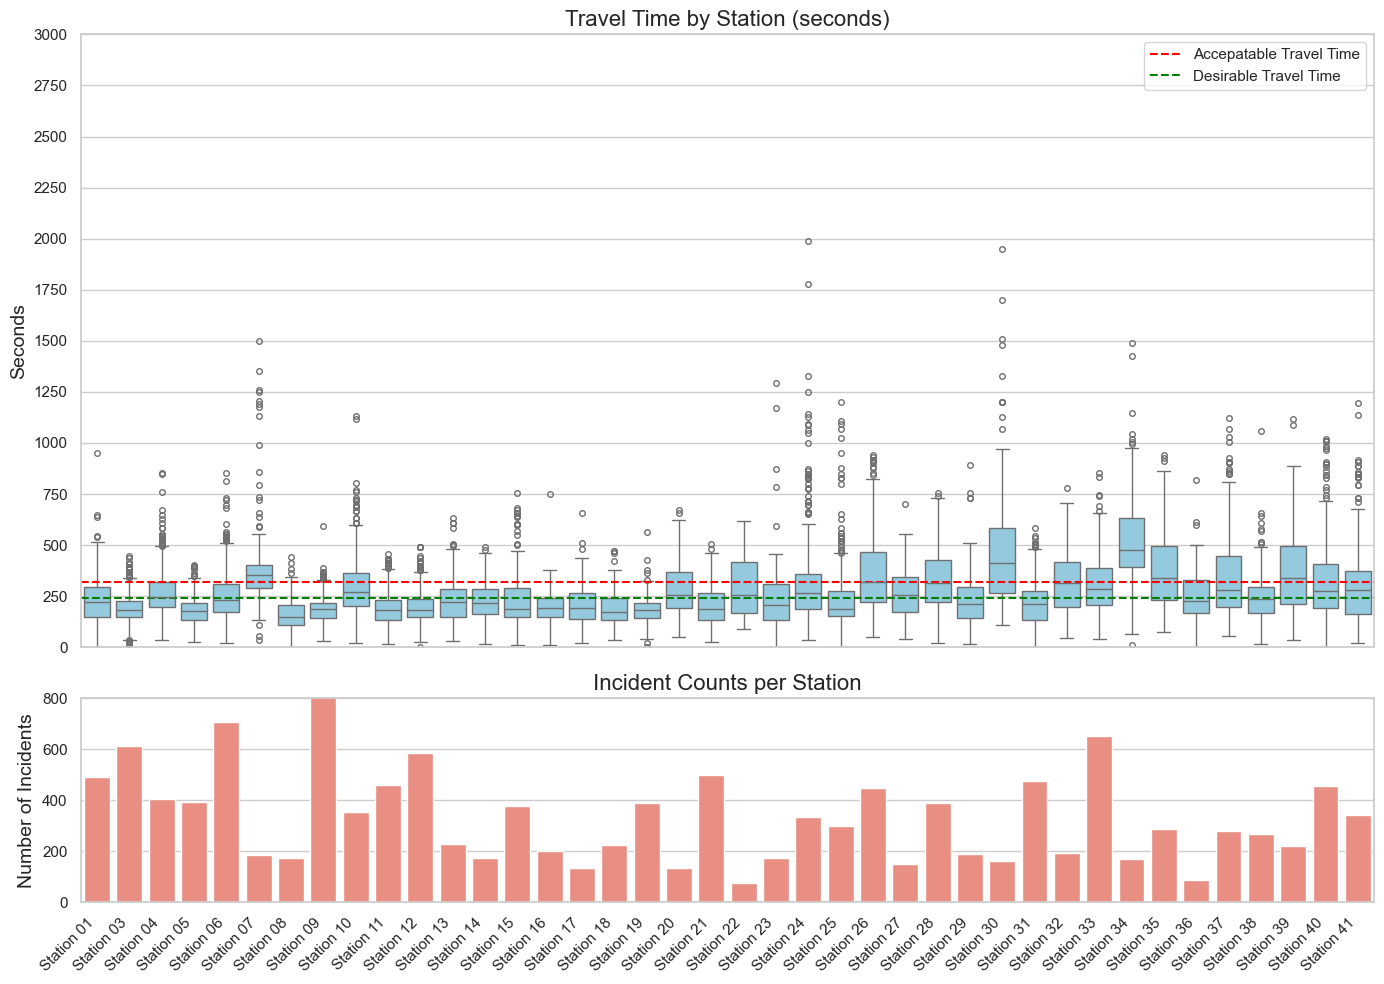

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- Prepare the data ---
# station_summary has columns: StationID, TotalIncidents, TravelTimes (a list)
# Explode the travel‐time lists into long form for seaborn
df_box = (
    station_summary
    .loc[:, ['Facility Name','TravelTimes']]
    .explode('TravelTimes')
    .rename(columns={'TravelTimes':'TravelTime'})
)
df_box['TravelTime'] = df_box['TravelTime'].astype(float)

# Compute overall mean & median
overall_mean   = df_box['TravelTime'].mean()
overall_median = df_box['TravelTime'].median()

# --- Plot ---
sns.set_theme(style="whitegrid")

fig, (ax1, ax2) = plt.subplots(
    2, 1,
    figsize=(14, 10),
    gridspec_kw={'height_ratios':[3,1]},
    sharex=True
)

# 1) Boxplot panel
sns.boxplot(
    x='Facility Name', y='TravelTime',
    data=df_box,
    ax=ax1,
    color="skyblue",
    fliersize=4
)
ax1.axhline(320,   ls='--', color='red',   label='Accepatable Travel Time')
ax1.axhline(240, ls='--', color='green', label='Desirable Travel Time')
ax1.set_title("Travel Time by Station (seconds)", fontsize=16)
ax1.set_ylabel("Seconds", fontsize=14)
ax1.set_ylim(0, 3000)
ax1.set_yticks([0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000])
ax1.legend()

# 2) Barplot panel
sns.barplot(
    x='Facility Name', y='TotalIncidents',
    data=station_summary,
    ax=ax2,
    color="salmon"
)
ax2.set_title("Incident Counts per Station", fontsize=16)
ax2.set_ylabel("Number of Incidents", fontsize=14)
ax2.set_xlabel("")  # hide the x‐label; we'll use ticklabels
ax2.set_ylim(0, 800)
ax2.set_yticks([0,200,400,600,800])
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()
